In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import csv

#Escrever um arquivo csv (excel)

In [2]:
with open('./teste.csv', 'w') as csvfile:
    csv.writer(csvfile, delimiter=',').writerow(['r', 'I' ])
    csv.writer(csvfile, delimiter=',').writerow([1.5, 211.0])
    csv.writer(csvfile, delimiter=',').writerow([2.5, 89.0])

In [ ]:
l= pd.read_csv("teste.csv")
l

,r,I
0,1.5,211.0
1,2.5,89.0


#Dados

Equação: I = A*r**(-2)

Log nos dois:

**log(I) = - n*log(r) + log(A)**

**y    =  ax +    b**

n=2 (ref)

a deve ser -2

In [ ]:
data = pd.read_csv("data.csv")
data.insert(2, "1/r**2", 1/data.r**2)
data.insert(3, "logr", np.log10(data.r))
data.insert(4, "logI", np.log10(data.I))

In [ ]:
data

,r,I,1/r**2,logr,logI
0,1.5,211.0,0.444444,0.176091,2.324282
1,2.5,89.0,0.160000,0.397940,1.949390
2,3.5,49.0,0.081633,0.544068,1.690196
3,4.5,31.0,0.049383,0.653213,1.491362
4,5.5,20.0,0.033058,0.740363,1.301030
5,6.5,14.2,0.023669,0.812913,1.152288
6,7.5,11.4,0.017778,0.875061,1.056905
7,8.5,8.5,0.013841,0.929419,0.929419
8,9.5,6.9,0.011080,0.977724,0.838849
9,10.5,5.8,0.009070,1.021189,0.763428


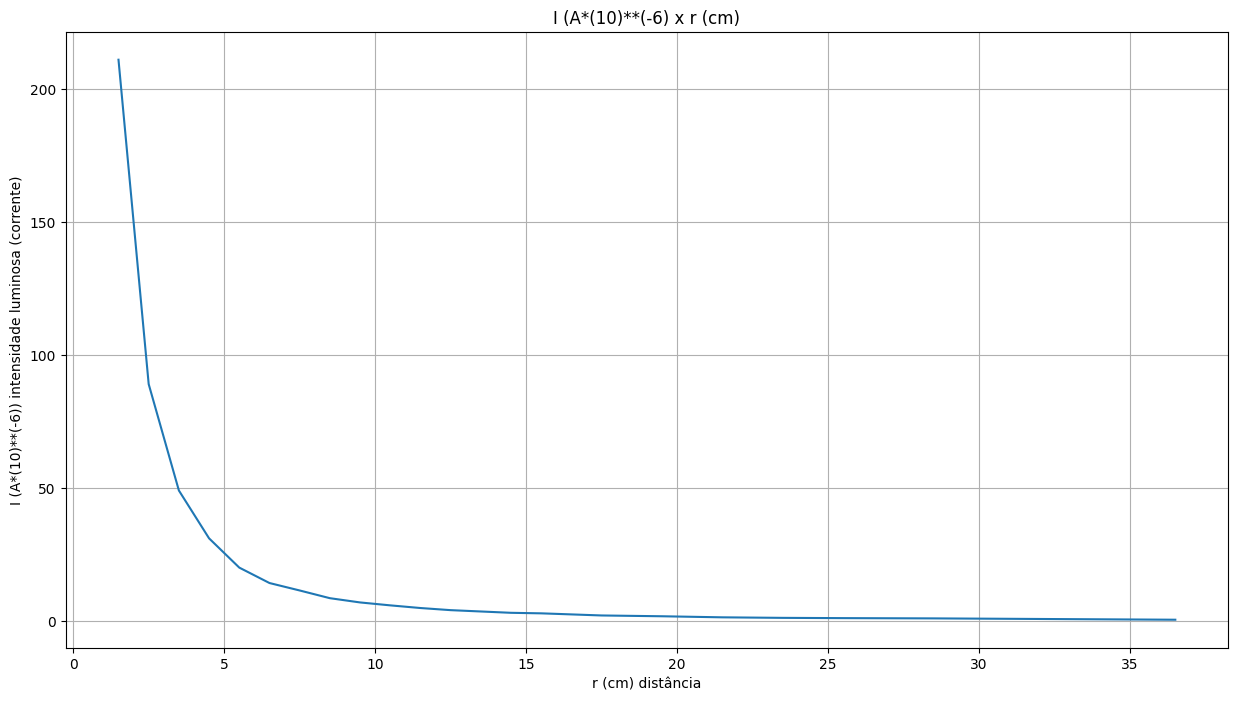

In [ ]:
# Gráfico I vs r
plt.figure(figsize=(15,8))
plt.plot(data.r, data.I)
plt.title("I (A*(10)**(-6) x r (cm)")
plt.xlabel("r (cm) distância")
plt.ylabel("I (A*(10)**(-6)) intensidade luminosa (corrente)")
plt.grid()
# plt.savefig("intensidade_luminosa vs distancia.png")
plt.show()
plt.close()

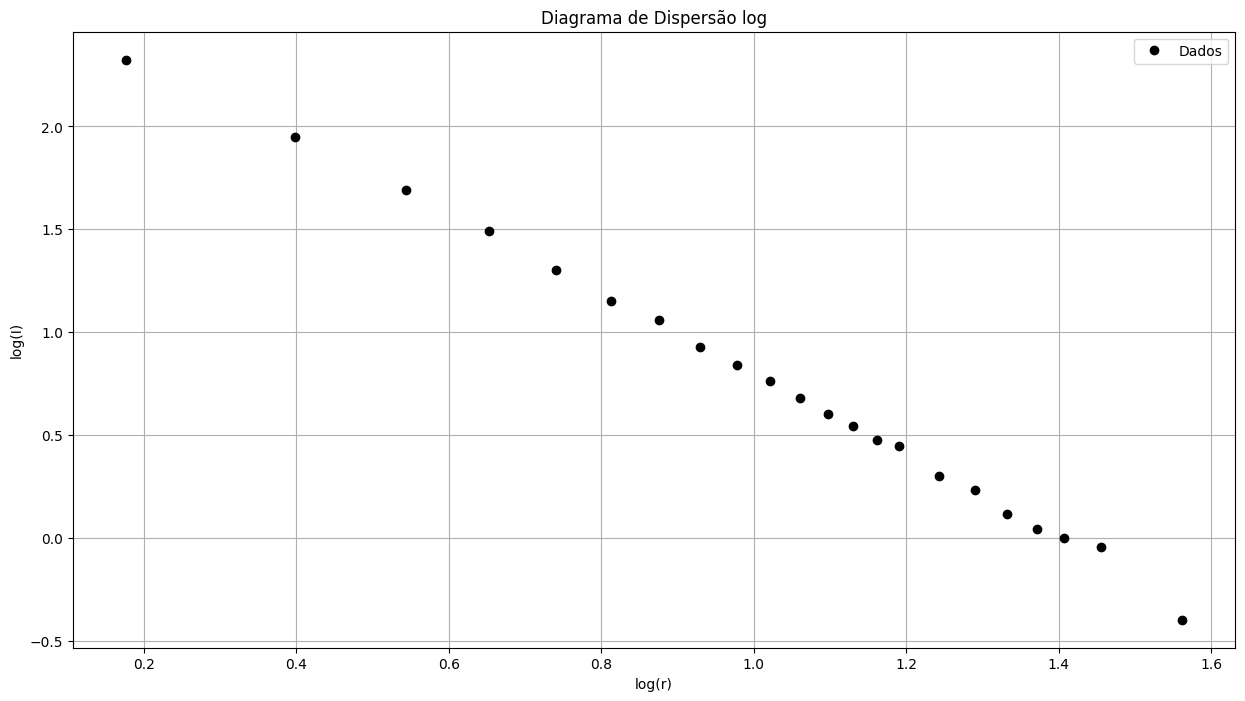

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data.logr, data.logI, "o", color="black", label="Dados")
plt.title('Diagrama de Dispersão log')
plt.xlabel("log(r)")
plt.ylabel("log(I)")
plt.legend()
plt.grid()
# plt.savefig("logaritimo da intensidade luminosa vs logaritmo da distancia.png")
plt.show()
plt.close()

# Ajuste linear linear

In [ ]:
lista_x = data.logr.values.tolist()
lista_x

[0.17609125905568124,
 0.3979400086720376,
 0.5440680443502757,
 0.6532125137753437,
 0.7403626894942439,
 0.8129133566428556,
 0.8750612633917001,
 0.9294189257142927,
 0.9777236052888477,
 1.021189299069938,
 1.0606978403536118,
 1.0969100130080565,
 1.130333768495006,
 1.1613680022349748,
 1.1903316981702914,
 1.2430380486862944,
 1.290034611362518,
 1.3324384599156054,
 1.3710678622717363,
 1.4065401804339552,
 1.4548448600085102,
 1.5622928644564746]

In [ ]:
lista_y = data.logI.values.tolist()
lista_y

[2.3242824552976926,
 1.9493900066449128,
 1.6901960800285136,
 1.4913616938342726,
 1.3010299956639813,
 1.1522883443830565,
 1.0569048513364727,
 0.9294189257142927,
 0.8388490907372553,
 0.7634279935629373,
 0.6812412373755872,
 0.6020599913279624,
 0.5440680443502757,
 0.47712125471966244,
 0.4471580313422192,
 0.3010299956639812,
 0.2304489213782739,
 0.11394335230683678,
 0.04139268515822507,
 0.0,
 -0.045757490560675115,
 -0.3979400086720376]

In [ ]:
x= np.array(lista_x)
y= np.array(lista_y)
x

array([0.17609126, 0.39794001, 0.54406804, 0.65321251, 0.74036269,
       0.81291336, 0.87506126, 0.92941893, 0.97772361, 1.0211893 ,
       1.06069784, 1.09691001, 1.13033377, 1.161368  , 1.1903317 ,
       1.24303805, 1.29003461, 1.33243846, 1.37106786, 1.40654018,
       1.45484486, 1.56229286])

In [ ]:
def raiz_da_media_quadratica(x):
    list_quadx = []
    for i in x:
      x2 = i*i
      list_quadx.append(x2)
    media_quadratica = np.sqrt(np.sum(list_quadx)/len(list_quadx))
    return media_quadratica

In [ ]:
def desvio_padrao(lista):
 Listaquad = []
 for i in lista:
    quadrados = i**2
    Listaquad.append(quadrados)
 med_dos_quadrados = np.sum(Listaquad)/len(Listaquad)
 desv_pad2 = np.sqrt(med_dos_quadrados - np.mean(lista)**2)
 return desv_pad2

In [ ]:
 def covariancia2(array1,array2):
  cov = np.mean( array1 * array2) - np.mean( array1 ) * np.mean( array2 )
  return cov

In [ ]:
desvio_padrao(x)

0.3475315420697198

In [ ]:
desvio_padrao(y)

0.6768007880534036

In [ ]:
covariancia2(x,y)

-0.23497074422333575

In [ ]:
r = (covariancia2(x,y))/(desvio_padrao(x)*desvio_padrao(y))
r

-0.9989844066696979

#Parâmetros

**y=ax+b**

In [ ]:
a= covariancia2(x,y)/((desvio_padrao(x))**2)
a

-1.9454735810756287

In [ ]:
b = np.mean(y) - a*np.mean(x)
b

2.7329437211738647

In [ ]:
print('y = ', round(a,3), 'x +', round(b,3))

y =  -1.945 x + 2.733


In [ ]:
N = float(len(x))
N

22.0

In [ ]:
Ey = desvio_padrao(y)*np.sqrt(1-(r**2))*np.sqrt(N/float(N-2))
Ey

0.031983193200217794

In [ ]:
erro_de_a = Ey/(desvio_padrao(x)*np.sqrt(N))
erro_de_a 

0.01962077934283837

In [ ]:
erro_de_b = erro_de_a*raiz_da_media_quadratica(x)
erro_de_b

0.02113272291228216

In [ ]:
print('y = ', round(a,3), 'x +', round(b,3))

y =  -1.945 x + 2.733


In [ ]:
lista_y_ajuste_linear= []
for elemento in x:
  y_new = a*elemento + b
  lista_y_ajuste_linear.append(y_new)

lista_y_ajuste_linear

[2.3903628288226924,
 1.9587619474494091,
 1.67447371458292,
 1.4621360327959334,
 1.2925876683487143,
 1.1514422621216787,
 1.03053515142265,
 0.9247837554450158,
 0.8308082774903955,
 0.7462469185561611,
 0.6693840952619379,
 0.5989342700493667,
 0.5339092367691745,
 0.4735329549191394,
 0.4171848496666737,
 0.31464603718287787,
 0.2232154660949197,
 0.14071989899895643,
 0.06556741726236304,
 -0.003443040581743162,
 -0.09741851853636341,
 -0.306455772529175]

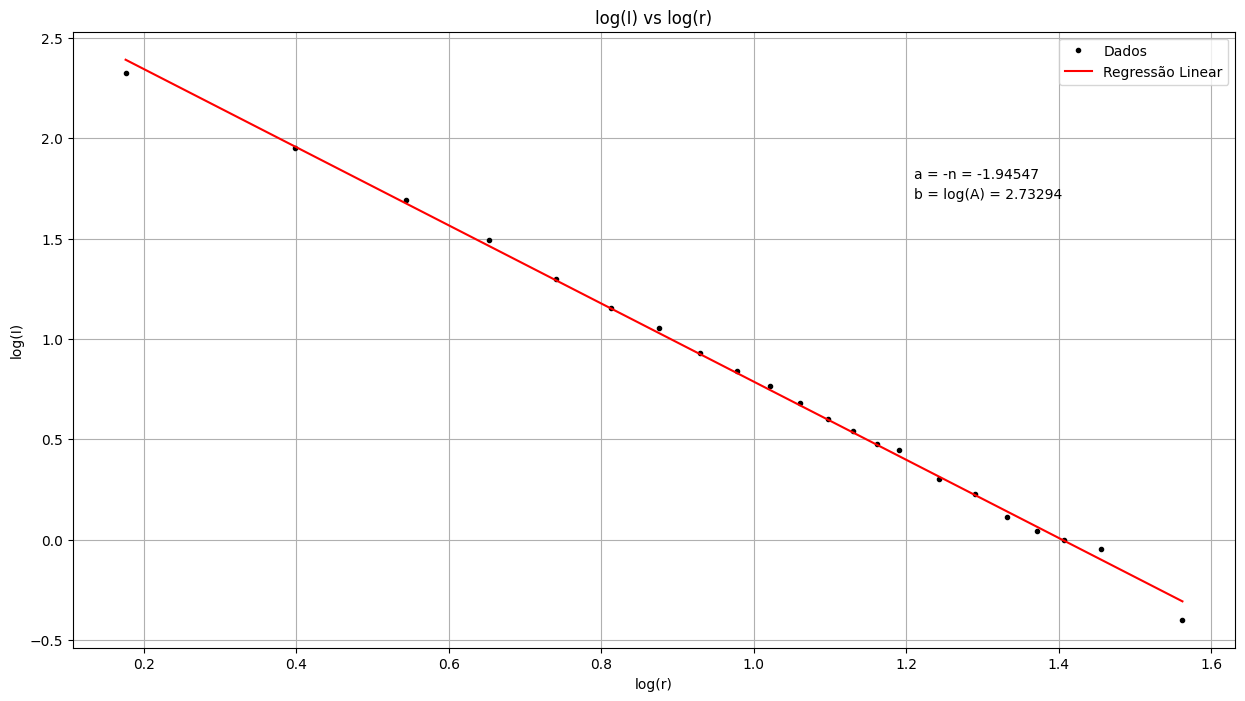

In [ ]:
# Gráfico log(I) vs log(r) com regressão linear
plt.figure(figsize=(15,8))
plt.plot(x, y, ".", color="black", label="Dados")
plt.plot([x[0],x[-1]], [lista_y_ajuste_linear[0],lista_y_ajuste_linear[-1]], "-", color="red", label="Regressão Linear")
plt.title("log(I) vs log(r)")
plt.xlabel("log(r)")
plt.ylabel("log(I)")
plt.text(1.21, 1.8, "a = -n = %.5f" % a)
plt.text(1.21, 1.7, "b = log(A) = %.5f" % b)
plt.legend()
plt.grid()
# plt.savefig("logaritimo da intensidade luminosa vs logaritmo da distancia.png")
plt.show()
plt.close()

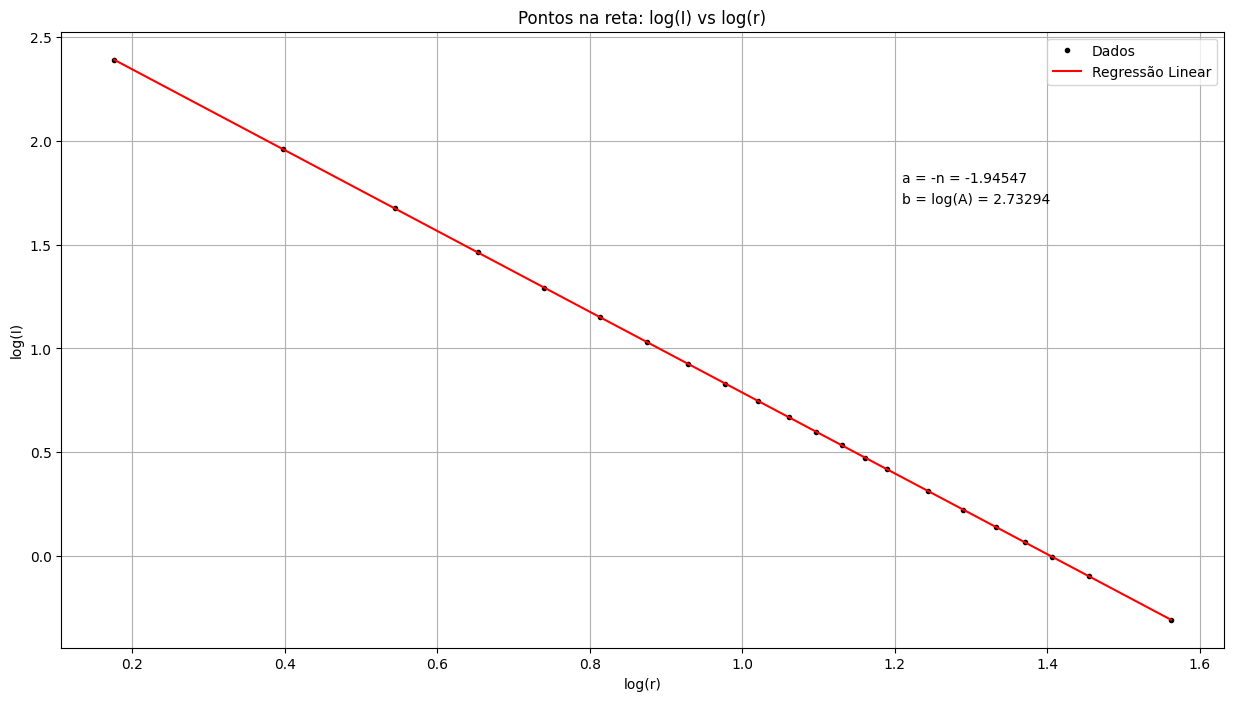

In [ ]:
# Gráfico log(I) vs log(r) com pontos na reta
plt.figure(figsize=(15,8))
plt.plot(x, lista_y_ajuste_linear, ".", color="black", label="Dados", bins = 8)
plt.plot([x[0],x[-1]], [lista_y_ajuste_linear[0],lista_y_ajuste_linear[-1]], "-", color="red", label="Regressão Linear")
plt.title("Pontos na reta: log(I) vs log(r)")
plt.xlabel("log(r)")
plt.xlim(0.3,0.8)
plt.ylabel("log(I)")
plt.text(1.21, 1.8, "a = -n = %.5f" % a)
plt.text(1.21, 1.7, "b = log(A) = %.5f" % b)
plt.legend()
plt.grid()
# plt.savefig("Pontos na reta: logaritimo da intensidade luminosa vs logaritmo da distancia.png")
plt.show()
plt.close()

# Alternativo (back up)

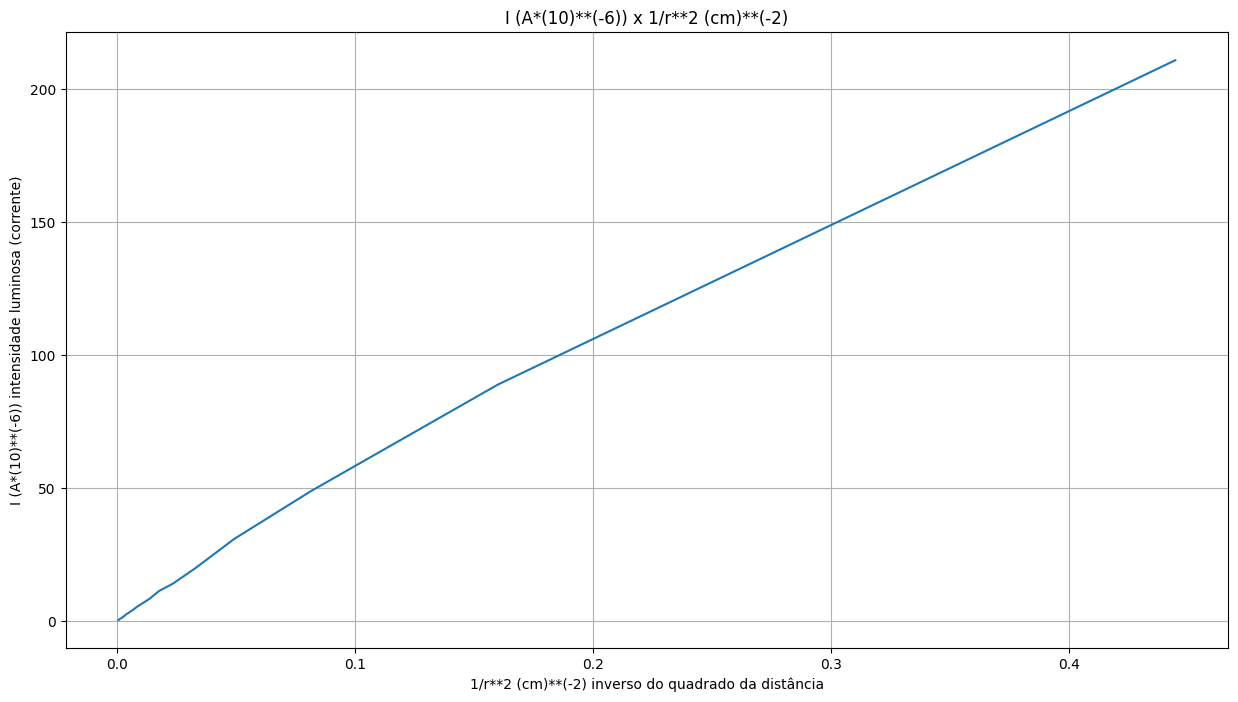

In [ ]:
# Gráfico I vs 1/r**2
plt.figure(figsize=(15,8))
plt.plot(data["1/r**2"], data.I)
plt.title("I (A*(10)**(-6)) x 1/r**2 (cm)**(-2)")
plt.xlabel("1/r**2 (cm)**(-2) inverso do quadrado da distância")
plt.ylabel("I (A*(10)**(-6)) intensidade luminosa (corrente)")
plt.grid()
# plt.savefig("intensidade_luminosa vs distancia^-2.png")
plt.show()
plt.close()

numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False) 

p(x) = p[0] * x**deg + ... + p[deg]

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [ ]:
# Dado a equação I = A*r**(-2)
# Aplicando o log dos dois lados, temos:
# log(I) = log(A)-n*log(r)
# Teoricamente n = 2, a partir dos dados coletados
# é possível determinar `n` experimentalmente através de uma regressão linear
coefficients = np.polyfit(data.logr, data.logI, 1) #lista
print(coefficients)

[-1.94547358  2.73294372]


In [ ]:
poly = np.poly1d(coefficients) #polinômio
print(poly)

 
-1.945 x + 2.733


In [ ]:
#Exemplo
fit = poly(data.logr)
print(fit)

[ 2.39036283  1.95876195  1.67447371  1.46213603  1.29258767  1.15144226
  1.03053515  0.92478376  0.83080828  0.74624692  0.6693841   0.59893427
  0.53390924  0.47353295  0.41718485  0.31464604  0.22321547  0.1407199
  0.06556742 -0.00344304 -0.09741852 -0.30645577]


In [ ]:
# correlation_matrix = np.corrcoef(data.logr, data.logI)
# correlation_xy = correlation_matrix[0,1]
# print(correlation_matrix)
# r_squared = correlation_xy**2
# print(r_squared)

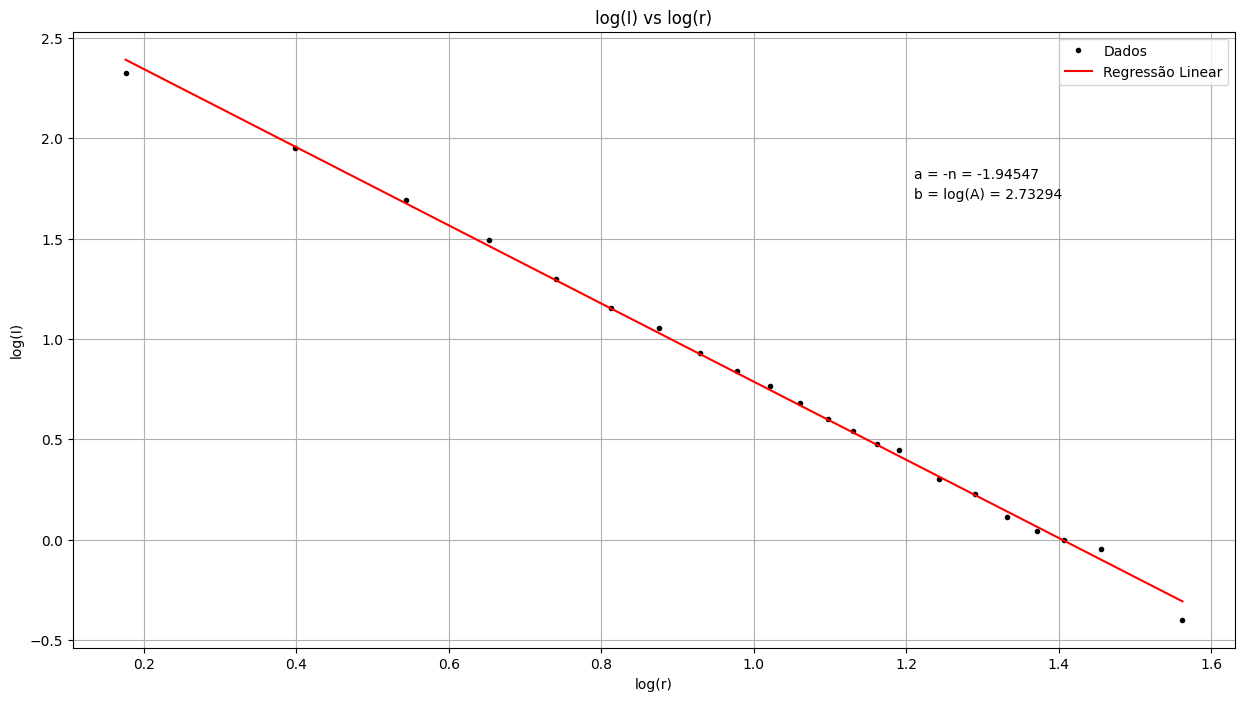

In [ ]:
# Gráfico log(I) vs log(r) com regressão linear
plt.figure(figsize=(15,8))
plt.plot(data.logr, data.logI, ".", color="black", label="Dados")
plt.plot(data.logr, fit, "-", color="red", label="Regressão Linear")
plt.title("log(I) vs log(r)")
plt.xlabel("log(r)")
plt.ylabel("log(I)")
plt.text(1.21, 1.8, "a = -n = %.5f" % coefficients[0])
plt.text(1.21, 1.7, "b = log(A) = %.5f" % coefficients[1])
# plt.text(1.21, 1.6, "R**2 = %.5f" % r_squared)
plt.legend()
plt.grid()
# plt.savefig("logaritimo da intensidade luminosa vs logaritmo da distancia.png")
plt.show()
plt.close()

In [ ]:
# print('Log r')
# print(data.logr)
# print('Log I')
# print(data.logI)
print('Erro logr')
print(stat.stdev(data.logr))
print('Erro logI')
print(stat.stdev(data.logI))
print(np.cov(data.logr, data.logI))
covariancia= np.cov(data.logr, data.logI)[1,0]
r= covariancia/(stat.stdev(data.logr)*stat.stdev(data.logI))
print('r =', r)
print('rquadrado=', r**2)
N=len(data.r)
n= N-2
errodea= stat.stdev(data.logI)*(1-(r)**2)**(1/2)/(stat.stdev(data.logr)*(n)**(1/2))
print('erro de a=', errodea)


Erro logr
0.355709873762437
Erro logI
0.6927276915558273
[[ 0.12652951 -0.24615983]
 [-0.24615983  0.47987165]]
r = -0.9989844066696983
rquadrado= 0.9979698447692092
erro de a= 0.019620779342834058
